## Area of duck by Monte Carlo Integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data
xu = [0.8,0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
yu = [1.25,1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]
xl = [13.3,13.0,12.6,12.3,12.0,11.5,11.0,10.8,10.7,10.5,10.0,9.5,9.0,8.8,8.6,8.5,8.4,8.2,8.1,7.8,7.6,7.3,7.0,6.6,6.1,5.6,5.6,5.3,5.0,4.7,4.4,4.3,4.0,3.5,3.0,2.5,2.3,2.2,2.0,1.6,1.2,1.0,0.9,0.8]
yl = [0.25,0.15,0.1,0.05,0.0,-0.05,-0.05,-0.05,0.0,-0.15,-0.3,-0.5,-0.55,-0.5,-0.5,-0.55,-0.75,-1.2,-1.75,-2.3,-2.8,-3.35,-3.85,-4.4,-4.85,-5.25,0.1,0.25,0.5,0.75,1.0,1.1,1.1,1.1,1.1,1.15,1.2,1.15,1.1,1.05,1.0,1.05,1.1,1.25]

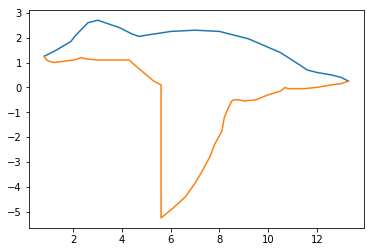

In [3]:
#plot data
plt.plot(xu,yu)
plt.plot(xl,yl)
plt.show()

In [4]:
# convert list to array
Xu = np.array(xu)
Yu = np.array(yu)
Xl = np.array(xl)
Yl = np.array(yl)

In [5]:
#create functions from interpolations over upper and lower data
from scipy.interpolate import interp1d
fu = interp1d(Xu,Yu)
fl = interp1d(Xl,Yl)

In [6]:
def Monte_Carlo_Integral(N,upper_function, lower_function, x_min, x_max):
    '''A monte carlo integrator with N points'''
    x = np.linspace(x_min,x_max,N)
    yu = upper_function(x)
    yl = lower_function(x)
    width = x_max-x_min
    y_max = np.amax(yu)
    y_min = np.amin(yl)
    height = y_max-y_min
    Area = height*width
    y = (y_max-y_min)*np.random.random(N)-(abs(y_min))
    condition = (yu >= y) & (yl <= y)
    count = np.sum(condition)
    return Area*count/N

In [7]:
#compute area
duck_area = Monte_Carlo_Integral(10**7,fu,fl,0.8,13.3)

print('the area of the duck is\n', duck_area)

the area of the duck is
 28.6928104119
